<a href="https://colab.research.google.com/github/codeshujaa/Heart_patient_analysis/blob/main/Heart_patients_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv("https://writersadminfiles.fra1.digitaloceanspaces.com/employer/uploads/Copy%20of%20heart_patients_dataset.csv68b8a4e5f40dc29079.txt")

In [ ]:
data.head()

,Unique Ids,Name,Disease,Hospital,Gender,Operation Cost,Survived
0,338764,Jane Smith,Sudden Cardiac Arrest,Hospital 14,Other,19969.92,Yes
1,338765,Chris Brown,Aortic Aneurysm,Hospital 18,Male,35239.59,No
2,338766,Emily Williams,Sudden Cardiac Arrest,Hospital 29,Other,45484.99,No
3,338767,Jane Martinez,Ventricular Tachycardia,Hospital 23,Female,45398.14,Yes
4,338768,Jane Clark,Sudden Cardiac Arrest,Hospital 23,Male,12614.61,Yes


In [ ]:
data.shape

(3000, 7)

In [ ]:
data.isnull().sum()

,0
Unique Ids,0
Name,0
Disease,0
Hospital,0
Gender,0
Operation Cost,0
Survived,0


In [ ]:
data2 = pd.read_csv("https://writersadminfiles.fra1.digitaloceanspaces.com/employer/uploads/heart_patients_followup.csv68b8a4e608cba29079.txt")

In [ ]:
data2.head()

,Unique Ids,Treatment Date,Follow-up Status,Additional Cost,Recovery Time (Days)
0,338764,45292,Cured,1382,49
1,338765,45292,Dead,4908,0
2,338766,45292,Suffering,4568,168
3,338767,45292,Cured,3066,58
4,338768,45292,Cured,3777,43


In [ ]:
data2.shape

(3000, 5)

In [ ]:
data2.isnull().sum()

,0
Unique Ids,0
Treatment Date,0
Follow-up Status,0
Additional Cost,0
Recovery Time (Days),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique Ids      3000 non-null   int64  
 1   Name            3000 non-null   object 
 2   Disease         3000 non-null   object 
 3   Hospital        3000 non-null   object 
 4   Gender          3000 non-null   object 
 5   Operation Cost  3000 non-null   float64
 6   Survived        3000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 164.2+ KB


In [ ]:
data['Survived'].value_counts()

,count
Survived,
Yes,1564
No,1436


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data['Gender'].value_counts()

,count
Gender,
Female,1020
Male,1012
Other,968


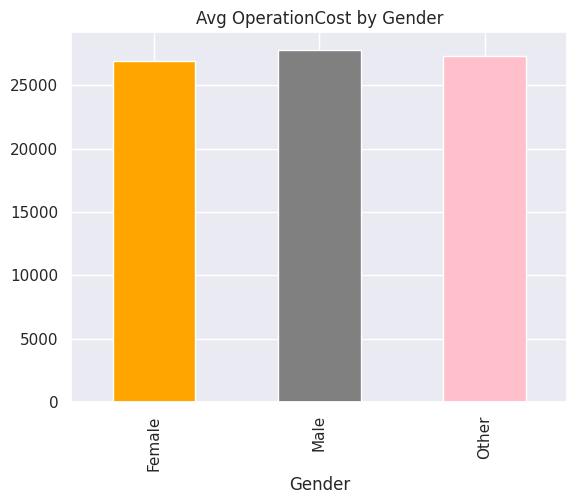

In [ ]:
avg_OperationCost = data.groupby('Gender')['Operation Cost'].mean()
avg_OperationCost.plot(kind='bar', color=['orange', 'grey',  'pink'])
plt.title("Avg OperationCost by Gender")
plt.show()

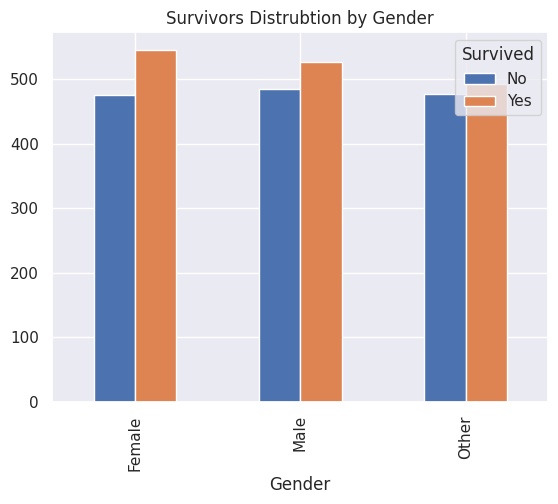

In [ ]:
counts = data.groupby(['Gender', 'Survived']).size().unstack()
counts.plot(kind='bar')
plt.title('Survivors Distrubtion by Gender')
plt.show()

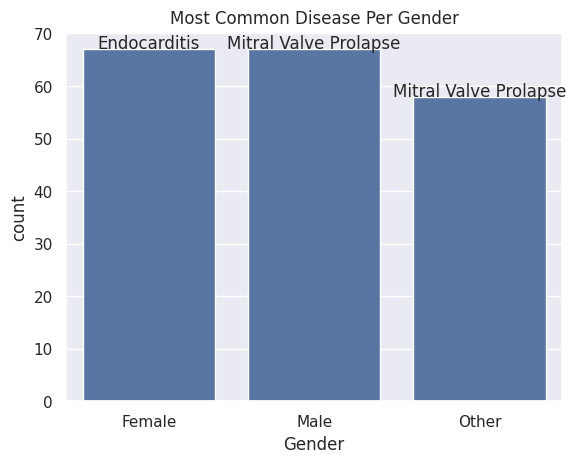

In [ ]:
count_dis = data.groupby(['Gender', 'Disease']).size().reset_index(name='count')
top_dis= count_dis.loc[count_dis.groupby('Gender')['count'].idxmax()]

sns.barplot(x='Gender', y='count', data=top_dis)


for i, row in top_dis.iterrows():
  plt.text(row['Gender'], row['count']+0.1, row['Disease'], ha = 'center')

plt.title('Most Common Disease Per Gender')
plt.show()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique Ids            3000 non-null   int64 
 1   Treatment Date        3000 non-null   int64 
 2   Follow-up Status      3000 non-null   object
 3   Additional Cost       3000 non-null   int64 
 4   Recovery Time (Days)  3000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 117.3+ KB


In [ ]:
data2['Recovery Time (Days)'].unique()

array([ 49,   0, 168,  58,  43,  59,  42,  95,  10, 112,  24,  56,  22,
        47,  28,   8,  27,  50,  45,  53,  98,  35,  32,  23,  37,  57,
       132, 154,  20,  55,  54,  52,  73,  39,  41,  26,  61, 174, 100,
        25, 160,  18,  13,  11, 165,  38, 133, 128, 104,  68, 159,  15,
        84,  21,  65,  48, 138, 152, 141,  17,   9, 173,  44, 148, 116,
       136, 127, 156,  34, 111,  96,  14,  40,  64, 177,  51,  92,  36,
        31,  19,  94,  29, 106,  16,  12, 114,  62,  30, 102, 119, 172,
       125,  70,  77,  46, 166, 157, 142,  33,  85,  88,  75, 155, 108,
        72,  87, 176,  89,   7,  97, 117,  82, 163,  69, 151,  83,  81,
       171, 101, 164, 123,  91,  90, 126, 146, 129, 162, 135,  86,  79,
        71, 107, 153, 143, 147, 109,  63, 149, 120, 150,  80, 158, 113,
       122,  74, 175, 118, 134, 167, 131,  99, 145, 137, 161, 170,  93,
        78,  67, 179, 130, 105, 169, 124, 121, 115, 178, 103,  76, 140,
       144, 139, 110,  60,  66])

In [ ]:
data2['Follow-up Status'].unique()

array(['Cured', 'Dead', 'Suffering'], dtype=object)

In [ ]:
df = pd.concat([data, data2], axis=1)

In [ ]:
df.head()

,Unique Ids,Name,Disease,Hospital,Gender,Operation Cost,Survived,Unique Ids,Treatment Date,Follow-up Status,Additional Cost,Recovery Time (Days)
0,338764,Jane Smith,Sudden Cardiac Arrest,Hospital 14,Other,19969.92,Yes,338764,45292,Cured,1382,49
1,338765,Chris Brown,Aortic Aneurysm,Hospital 18,Male,35239.59,No,338765,45292,Dead,4908,0
2,338766,Emily Williams,Sudden Cardiac Arrest,Hospital 29,Other,45484.99,No,338766,45292,Suffering,4568,168
3,338767,Jane Martinez,Ventricular Tachycardia,Hospital 23,Female,45398.14,Yes,338767,45292,Cured,3066,58
4,338768,Jane Clark,Sudden Cardiac Arrest,Hospital 23,Male,12614.61,Yes,338768,45292,Cured,3777,43


In [ ]:
df.drop(columns= 'Unique Ids')

,Name,Disease,Hospital,Gender,Operation Cost,Survived,Treatment Date,Follow-up Status,Additional Cost,Recovery Time (Days)
0,Jane Smith,Sudden Cardiac Arrest,Hospital 14,Other,19969.92,Yes,45292,Cured,1382,49
1,Chris Brown,Aortic Aneurysm,Hospital 18,Male,35239.59,No,45292,Dead,4908,0
2,Emily Williams,Sudden Cardiac Arrest,Hospital 29,Other,45484.99,No,45292,Suffering,4568,168
3,Jane Martinez,Ventricular Tachycardia,Hospital 23,Female,45398.14,Yes,45292,Cured,3066,58
4,Jane Clark,Sudden Cardiac Arrest,Hospital 23,Male,12614.61,Yes,45292,Cured,3777,43
...,...,...,...,...,...,...,...,...,...,...
2995,Chris Davis,Sudden Cardiac Arrest,Hospital 5,Male,30568.41,No,45656,Suffering,2100,162
2996,Chris Williams,Mitral Valve Prolapse,Hospital 6,Other,49569.18,No,45656,Cured,3896,30
2997,Emily Johnson,Coronary Artery Disease,Hospital 14,Other,14477.72,Yes,45656,Cured,4902,9
2998,Alex Williams,Coronary Artery Disease,Hospital 17,Other,49596.19,Yes,45656,Cured,4105,36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique Ids            3000 non-null   int64  
 1   Name                  3000 non-null   object 
 2   Disease               3000 non-null   object 
 3   Hospital              3000 non-null   object 
 4   Gender                3000 non-null   object 
 5   Operation Cost        3000 non-null   float64
 6   Survived              3000 non-null   object 
 7   Unique Ids            3000 non-null   int64  
 8   Treatment Date        3000 non-null   int64  
 9   Follow-up Status      3000 non-null   object 
 10  Additional Cost       3000 non-null   int64  
 11  Recovery Time (Days)  3000 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 281.4+ KB


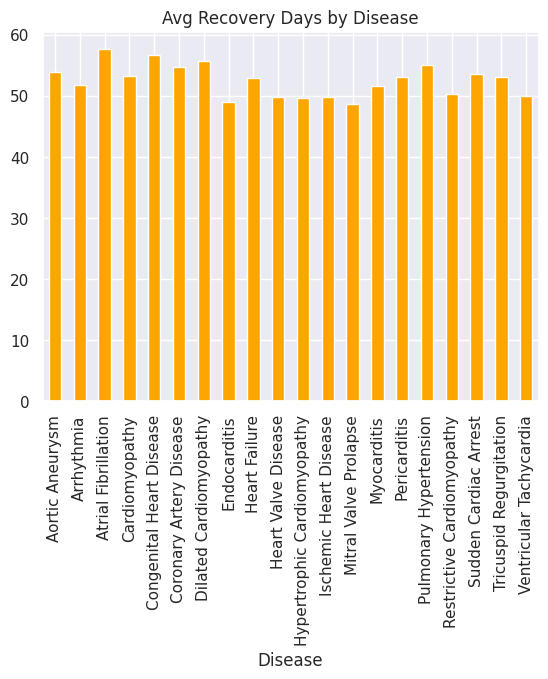

In [ ]:
avg_recovery = df.groupby('Disease')['Recovery Time (Days)'].mean()
avg_recovery.plot(kind = 'bar', color = 'orange')
plt.title('Avg Recovery Days by Disease')
plt.show()

In [ ]:
df['Follow-up Status'].unique()

array(['Cured', 'Dead', 'Suffering'], dtype=object)

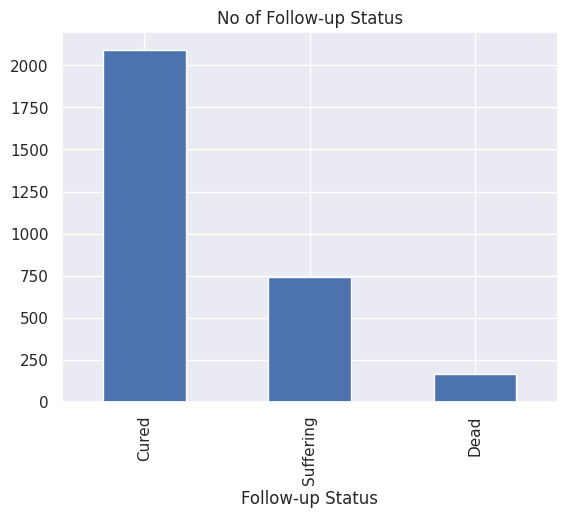

In [ ]:
fol_count = df['Follow-up Status'].value_counts().plot(kind = 'bar')
plt.title('No of Follow-up Status')
plt.show()

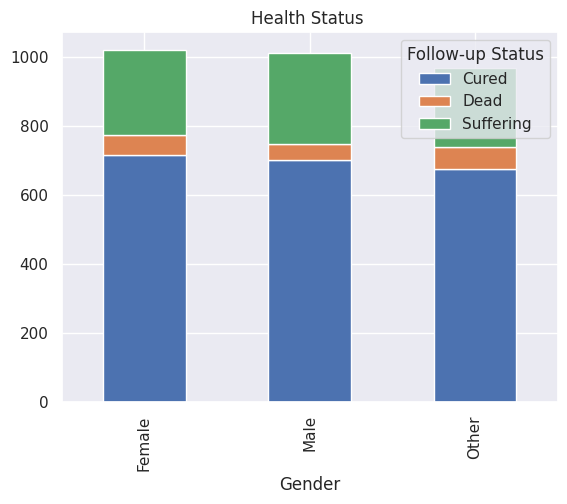

In [ ]:
counts = df.groupby(['Gender', 'Follow-up Status']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.title('Health Status ')
plt.show()